<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 1:**

**A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply**

**Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
Feature Name Description
Store Store number
Date Week of Sales
Weekly_Sales Sales for the given store in that week
Holiday_Flag If it is a holiday week
Temperature Temperature on the day of the sale
Fuel_Price Cost of the fuel in the region
CPI Consumer Price Index**

**Unemployment Unemployment Rate**

**1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:**

**a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

**c. Does temperature affect the weekly sales in any manner?**

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

**e. Top performing stores according to the historical data.**

**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

**2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/sample_data/Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
# data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# dataset shape
df.shape

(6435, 8)

In [11]:
# null check zero
df.isnull().sum()
# zero null value found

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [17]:
# Duplciate value check
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-1978340938.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  storeVsUnemployment = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Unemployment']))


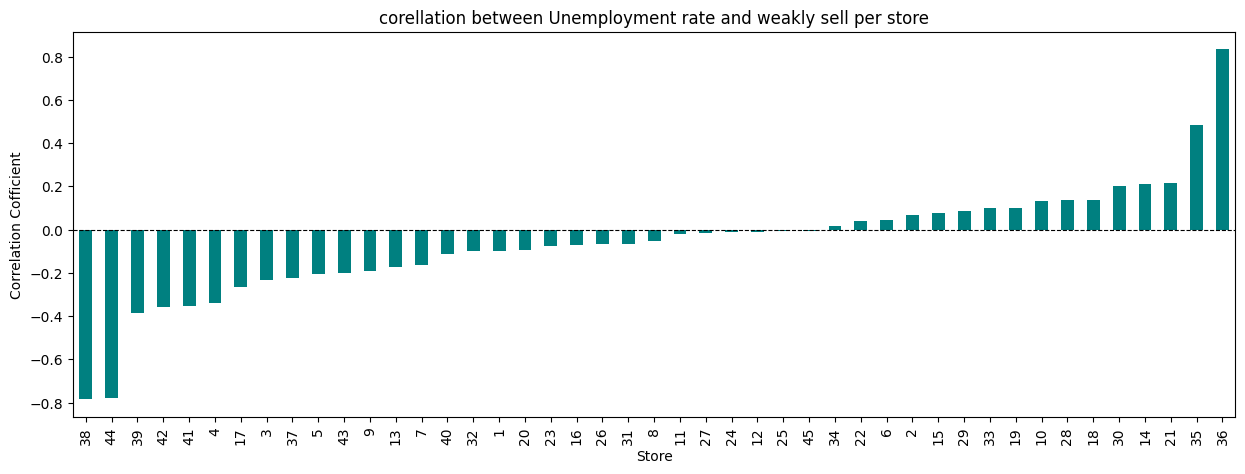

,0
Store,
38,-0.785290
44,-0.780076
39,-0.384681
42,-0.356355
41,-0.350630
4,-0.337015


In [21]:
#  a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


storeVsUnemployment = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Unemployment']))

#short store by corellation length
store_unemployment_corr = storeVsUnemployment.sort_values()


#plot corellation for each store
plt.figure(figsize=(15,5))
store_unemployment_corr.plot(kind='bar', color='teal')
plt.title('corellation between Unemployment rate and weakly sell per store')
plt.xlabel('Store')
plt.ylabel('Correlation Cofficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


store_unemployment_corr.head(6)

In [27]:
# b.If the weekly sales show a seasonal trend, when and what could be the reason?

# sort the data by dates so that we can get the seasonal relationship
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163
1178,9,2010-01-10,495692.19,0,69.08,2.603,215.214134,6.560
3037,22,2010-01-10,905987.17,0,69.31,2.717,136.629757,8.572
1893,14,2010-01-10,1855703.66,0,70.58,2.707,182.716838,8.724
4181,30,2010-01-10,445475.30,0,70.28,2.603,211.329874,8.163
...,...,...,...,...,...,...,...,...
6428,45,NaT,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,NaT,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,NaT,713173.95,0,64.88,3.997,192.013558,8.684
6433,45,NaT,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
sales_data = df.groupby('Date')['Weekly_Sales'].sum()
sales_data

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-03-09,47194257.61
2010-03-12,49909027.88
2010-04-06,50188543.12
2010-05-02,49750740.50
2010-05-03,46871470.30
2010-05-11,45781981.89


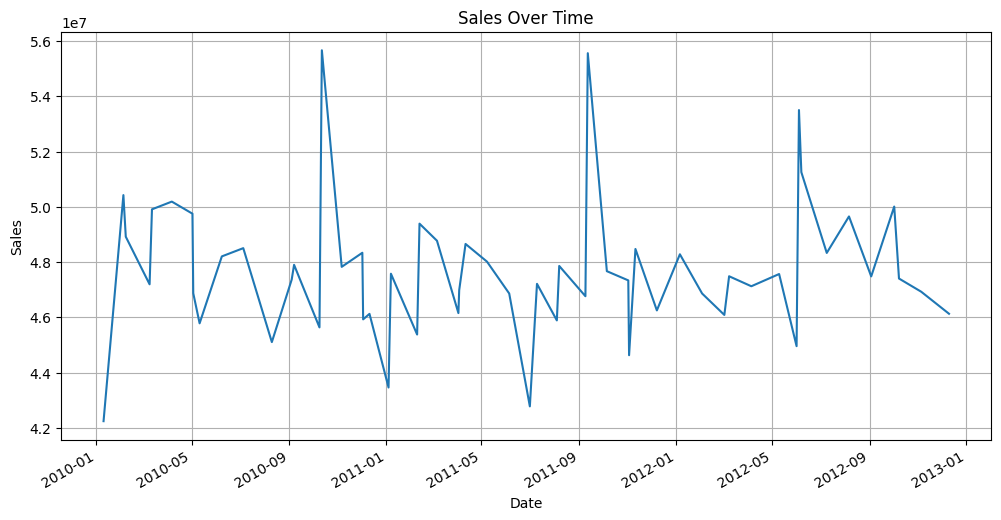

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sales_data.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# During holiday season every year there is hike in sales just before december like in october and november.

In [30]:
  #c. Does temperature affect the weekly sales in any manner?

Temp_corr = df['Temperature'].corr(df['Weekly_Sales'])
Temp_corr

np.float64(-0.06381001317946955)

# There is very less impact correlation is negative but close to zero.


In [31]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?
cpi_corr = df['CPI'].corr(df['Weekly_Sales'])
print(cpi_corr)

-0.07263416204017631


**#corr value is negative but near to zero, that mean if the Consumer Price index is increase the Weekly_Sales also decrease.**

In [33]:
#  e. Top performing stores according to the historical data.
top_performance_stores = df.groupby('Store')['Weekly_Sales'].mean()
top_performance_stores.sort_values(ascending=False).head(5)

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06


In [34]:
#  f.The worst performing store, and how significant is the difference between the
#  highest and lowest performing stores.
old_perform = df.groupby('Store')['Weekly_Sales'].mean()
old_perform.sort_values().head(1)


,Weekly_Sales
Store,
33,259861.692028


In [36]:
old_perform = df.groupby('Store')['Weekly_Sales'].mean()
max=old_perform.sort_values().max()
min=old_perform.sort_values().min()
print(f' Best  vs worst store performance:{max-min}')

 Best  vs worst store performance:1847815.1783216782


In [38]:
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks
!pip install prophet

In [40]:
from prophet import Prophet
from tqdm import tqdm

# Step 1: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df = df.dropna(subset=['Date'])

#step 2: Prepare data for forecasting: one model per store
result = {}

#step 3: Group by store and apply Prophet(which is use in loop)
stores = df['Store'].unique()

for store in tqdm(stores, desc="Training models per store"):
    store_df = df[df['Store'] == store][['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Skip if not enough data
    if len(store_df) < 20:
        continue


    # Prophet model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(store_df)



    # Future dataframe for 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    # Store last 12 weeks of forecast
    result[store] = forecast[['ds', 'yhat']].tail(12).reset_index(drop=True)

print(result)

/tmp/ipython-input-2518191955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
Training models per store:   0%|          | 0/45 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmpiaa5ault/w931k30w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiaa5ault/vr1dhe2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62691', 'data', 'file=/tmp/tmpiaa5ault/w931k30w.json', 'init=/tmp/tmpiaa5ault/vr1dhe2z.json', 'output', 'file=/tmp/tmpiaa5ault/prophet_modelavp8ci1i/prophet_model-20250814171057.csv', 'method=optimize', 'alg

{np.int64(2):            ds          yhat
0  2012-12-16  1.747383e+06
1  2012-12-23  1.685333e+06
2  2012-12-30  1.749748e+06
3  2013-01-06  1.854743e+06
4  2013-01-13  1.912928e+06
5  2013-01-20  1.920838e+06
6  2013-01-27  1.928037e+06
7  2013-02-03  1.952360e+06
8  2013-02-10  1.959727e+06
9  2013-02-17  1.926624e+06
10 2013-02-24  1.889123e+06
11 2013-03-03  1.904356e+06, np.int64(9):            ds           yhat
0  2012-12-16  564157.668672
1  2012-12-23  588249.862656
2  2012-12-30  598830.513399
3  2013-01-06  585768.155399
4  2013-01-13  569057.618903
5  2013-01-20  573965.485113
6  2013-01-27  600583.779347
7  2013-02-03  623962.305617
8  2013-02-10  623395.981701
9  2013-02-17  604996.641259
10 2013-02-24  591713.897648
11 2013-03-03  595372.778176, np.int64(22):            ds          yhat
0  2012-12-16  1.044939e+06
1  2012-12-23  1.125864e+06
2  2012-12-30  1.108620e+06
3  2013-01-06  9.698701e+05
4  2013-01-13  8.176047e+05
5  2013-01-20  7.849760e+05
6  2013-01-27  8.860